# Lab 01 - Data exploration and preprocessing

In [34]:
# !pip install pandas 
# !pip install matplotlib
# !pip install seaborn

In [35]:
# import dependencies
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introduction

### Dataset description

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


| Column Name | Data Type | Description | Possible Values |
|-------------|-----------|-------------|----------------|
| PassengerId | Integer   | Unique identifier for each passenger | 1, 2, 3, etc. |
| Survived    | Integer   | Survival indicator | 0 = No (Did not survive), 1 = Yes (Survived) |
| Pclass      | Integer   | Passenger ticket class | 1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower |
| Name        | String    | Full name of the passenger | "Braund, Mr. Owen Harris", etc. |
| Sex         | String    | Gender of the passenger | "male", "female" |
| Age         | Float     | Age of the passenger in years | 22.0, 40.0, etc. (may contain missing values) |
| SibSp       | Integer   | Number of siblings/spouses aboard the Titanic | 0, 1, 2, etc. |
| Parch       | Integer   | Number of parents/children aboard the Titanic | 0, 1, 2, etc. |
| Ticket      | String    | Ticket number | "A/5 21171", "PC 17599", etc. |
| Fare        | Float     | Price paid for the ticket | 7.25, 71.2833, etc. |
| Cabin       | String    | Cabin number | "C85", "E46", etc. (many missing values) |
| Embarked    | String    | Port of embarkation | "C" = Cherbourg, "Q" = Queenstown, "S" = Southampton |

### Objective of the lab

The quality of the data and the amount of useful information that it contains are key factors that determine how well a machine learning algorithm can learn. Therefore, it is absolutely critical that we make sure to examine and preprocess a dataset before we feed it to a learning algorithm. 

In this laboratory we will explore the data exploration and preprocessing pipeline.

#### What is a Dataset?

A data set (or dataset) is a collection of data. In the case of tabular data, a data set corresponds to one or more database tables, where every **column** of a table represents a particular **variable**, and each **row** corresponds to a given **record of the data** set in question. The data set lists values for each of the variables, such as for example height and weight of an object, for each member of the data set. Data sets can also consist of a collection of documents or files

Several characteristics define a data set's structure and properties. These include the number and types of the attributes or variables, and various statistical measures applicable to them.

The values may be numbers, such as real numbers or integers, for example representing a person's height in centimeters, but may also be nominal data (i.e., not consisting of numerical values), for example representing a person's ethnicity. More generally, values may be of any of the kinds described as a level of measurement.

Missing values may exist, which must be indicated somehow.

[Data set - Wikipedia](https://en.wikipedia.org/wiki/Data_set)

#### What are the different types of data?

The two main types of data are:

- Qualitative Data
- Quantitative Data

![types-of-data-img](img\types-of-data-1024x555-1.png)

---

**Qualitative or Categorical Data**
   
Qualitative or Categorical Data is a type of data that can’t be measured or counted in the form of numbers. These types of data are sorted by category, not by number. That’s why it is also known as Categorical Data. 

These data consist of audio, images, symbols, or text. The gender of a person, i.e., male, female, or others, is qualitative data.

Qualitative data tells about the perception of people. This data helps market researchers understand the customers’ tastes and then design their ideas and strategies accordingly. 

The Qualitative data are further classified into two parts :
   
- Nominal Data
    Nominal Data is used to label variables without any order or quantitative value. The color of hair can be considered nominal data, as one color can’t be compared with another color.

    With the help of nominal data, we can’t do any numerical tasks or can’t give any order to sort the data. These data don’t have any meaningful order; their values are distributed into distinct categories.

- Ordinal Data

    Ordinal data have natural ordering where a number is present in some kind of order by their position on the scale. These data are used for observation like customer satisfaction, happiness, etc., but we can’t do any arithmetical tasks on them. 

    Ordinal data is qualitative data for which their values have some kind of relative position. These kinds of data can be considered “in-between” qualitative and quantitative data.

    The ordinal data only shows the sequences and cannot use for statistical analysis. Compared to nominal data, ordinal data have some kind of order that is not present in nominal data. 

--- 

**Quantitative Data**
   
Quantitative data is a type of data that can be expressed in numerical values, making it countable and including statistical data analysis. These kinds of data are also known as Numerical data.

It answers the questions like “how much,” “how many,” and “how often.” For example, the price of a phone, the computer’s ram, the height or weight of a person, etc., falls under quantitative data. 

Quantitative data can be used for statistical manipulation. These data can be represented on a wide variety of graphs and charts, such as bar graphs, histograms, scatter plots, boxplots, pie charts, line graphs, etc.

- Discrete Data

    The term discrete means distinct or separate. The discrete data contain the values that fall under integers or whole numbers. The total number of students in a class is an example of discrete data. These data can’t be broken into decimal or fraction values.

    The discrete data are countable and have finite values; their subdivision is not possible. These data are represented mainly by a bar graph, number line, or frequency table.

- Continuous Data

    Continuous data are in the form of fractional numbers. It can be the version of an android phone, the height of a person, the length of an object, etc. Continuous data represents information that can be divided into smaller levels. The continuous variable can take any value within a range. 

    The key difference between discrete and continuous data is that discrete data contains the integer or whole number. Still, continuous data stores the fractional numbers to record different types of data such as temperature, height, width, time, speed, etc.

[Types Of Data - Great Learning](https://www.mygreatlearning.com/blog/types-of-data/)

## Dataset Loading

To start working with any dataset in Python, we typically use the pandas library, which allows us to load, manipulate, and analyze data easily in tabular form.

---

**What is Pandas?**

Pandas is an open-source software library designed for data manipulation and analysis. It provides data structures like series and DataFrames to easily clean, transform and analyze large datasets and integrates with other Python libraries, such as NumPy and Matplotlib.

It offers functions for data transformation, aggregation and visualization, which are important for analysis.

Pandas revolves around two primary Data structures: Series (1D) for single columns and DataFrame (2D) for tabular data enabling efficient data manipulation.

With pandas, you can perform a wide range of data operations, including

- Reading and writing data from various file formats like CSV, Excel and SQL databases.
- Cleaning and preparing data by handling missing values and filtering entries.
- Merging and joining multiple datasets seamlessly.
- Reshaping data through pivoting and stacking operations.
- Conducting statistical analysis and generating descriptive statistics.
- Visualizing data with integrated plotting capabilities.

[Pandas Tutorial - geeksforgeeks](https://www.geeksforgeeks.org/pandas-tutorial/)

---

In this case, the Titanic dataset is available in a CSV file. We'll load it using <code>[pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)</code>.

For loading file we need Pandas library.

What is Pandas? 

Pandas is one of the most important and widely-used Python libraries in data science, data analysis, and machine learning.

It was created specifically to make working with structured data (like tables and spreadsheets) fast, flexible, and expressive.

The name "pandas" is derived from "Panel Data", which is an econometrics term for multidimensional structured data, and also a fun nod to the panda bear 🐼.

In [10]:
DATASET_PATH = os.path.join("data", "lab-01", "Titanic-Dataset.csv")

# Load the dataset from the subfolder 'data/lab-01'
df = pd.read_csv(filepath_or_buffer=DATASET_PATH)

# Display the first 5 rows to check it's loaded correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Overview


Now that we’ve successfully loaded the dataset, it’s time to explore and play with it.

Before we start building any machine learning models or visualizations, we must understand:

- What kind of data we are working with

- The distribution of values across key columns

- If there are any unusual or suspicious entries (outliers, wrong types, etc.)

This step is known as Exploratory Data Analysis (EDA) — and it’s one of the most important steps in any data science project.

🔍 Why Is This Step Important?

- ✅ Data Understanding: We need to understand what each column means, what type of values it contains, and how it could relate to the outcome we want to predict (in this case, survival).

- 🚩 Anomaly Detection: This helps us spot outliers, inconsistent data, or wrong data types — all of which can affect the performance of our models.

- 🛠️ Planning Data Cleaning: Based on this step, we can make decisions about missing values, column drops, or transformations needed later.

This step is called Exploratory Data Analysis (EDA), and it’s one of the most critical stages in any data science pipeline.


In [14]:
# Check the shape of the dataset (rows, columns)
# DataFrame.shape: Return a tuple representing the dimensionality of the DataFrame.

print("Dataset shape:", df.shape)

Dataset shape: (891, 12)


In [15]:
# Show the column names
# DataFrame.columns: The column labels of the DataFrame.
print("\nColumn names:\n", df.columns.tolist())


Column names:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [26]:
# DataFrame.dtype: Return the dtypes in the DataFrame.
# This returns a Series with the data type of each column. 
# The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype. 
print("Features data types:")
df.dtypes

Features data types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# Display information about each column (data type, non-null values, etc.)
# DataFrame.info: Print a concise summary of a DataFrame.
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Explore the unique values of our *target* using the <code>[DataFrame.unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)</code> module.

In [29]:
print("Target unique values")
df["Survived"].unique()

Target unique values


array([0, 1])

Exercise: For the columns *Survived, Pclass, Sex, Embarked*, return the list of unique values

In [33]:
columns = ["Survived", "Pclass", "Sex", "Embarked"]
for col in columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}\n")

Column: Survived
Unique values: [0 1]

Column: Pclass
Unique values: [3 1 2]

Column: Sex
Unique values: ['male' 'female']

Column: Embarked
Unique values: ['S' 'C' 'Q' nan]



In [17]:
# Summary statistics for numerical columns
# DataFrame.describe: Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
# Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 
# The output will vary depending on what is provided.

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


**Exercise:** Together with the default percentile, return in the output also the 1st and 99th percentile

Check at this link the documentation of the module <code>[DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)</code>

In [ ]:
percentiles = ...
df.describe(percentiles=)

## Data Quality Check

Before we analyze or build models with our dataset, we need to ensure that the data is clean, complete, and reliable.

Even in well-known datasets like the Titanic dataset, we might encounter:

- ❌ Missing values: Empty cells or NaNs that need to be filled, removed, or flagged.

- 🧩 Inconsistent or incorrect formats: For example, a numerical column with text entries.

- 🎭 Duplicated entries: Repeated rows that can skew statistics and model results.

- 🧱 Outliers or unrealistic values: Extremely high or low numbers that don’t make sense (e.g., negative ages).

These issues can significantly affect model accuracy and lead to false conclusions. So, this step focuses on detecting potential problems and planning how to handle them.

In [ ]:
# 1. Check for missing values per column
print("🚫 Missing values per column:")
print(df.isnull().sum())

# 2. Optional: Check the percentage of missing values
print("\n📊 Percentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

# 3. Check for duplicated rows
print("\n📋 Number of duplicated rows:")
print(df.duplicated().sum())

# 4. Display rows with invalid or inconsistent data (examples)

# Example: Show rows with missing 'Age'
print("\n🔍 Rows with missing 'Age':")
print(df[df['Age'].isnull()].head())

# Example: Check for invalid ages (e.g., negative values)
print("\n⚠️ Rows with invalid 'Age' values (if any):")
print(df[df['Age'] < 0])

# Example: Check for unknown 'Sex' values
print("\n👀 Unique values in 'Sex' column:")
print(df['Sex'].unique())

🚫 Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

📊 Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

📋 Number of duplicated rows:
0

🔍 Rows with missing 'Age':
    PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN  

## Descriptive Statistics

After we’ve performed a basic overview and quality check, it’s time to understand how the values in our dataset are distributed — both numerical and categorical.

This step is essential because:

- It gives us an idea of the central tendency (e.g., average) and spread (e.g., variability) of data.

- It reveals outliers, data imbalance, and patterns that may not be immediately obvious.

- It helps us decide how to normalize, transform, or encode data before building models.

## Basic Data Visualization

After summarizing the dataset using statistics, the next step is to visualize the data. Visualization helps us spot patterns, trends, and anomalies that are hard to detect in raw numbers alone.

These visual tools make data intuitive and accessible, even for those without strong statistical backgrounds.



📊 1. Histogram + KDE

Purpose: Shows how a numerical variable is distributed (e.g., Age).

- Histogram shows count of values in intervals

- KDE (Kernel Density Estimation) smooths the distribution line

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

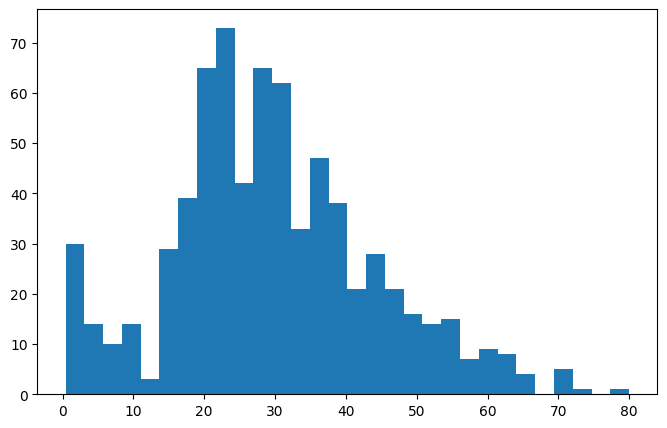

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram + KDE for Age
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title('Distribution of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


📦 2. Boxplot

Purpose: Great for comparing numeric distributions across categories and spotting outliers.

- Example: Age distribution by survival status

In [12]:
# Boxplot: Age vs. Survived
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Boxplot of Age by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


NameError: name 'plt' is not defined

📊 3. Count Plot (Bar Plot for Categories)

Purpose: Displays the frequency of each category in a variable (like value_counts, but visual).

In [ ]:
# Count plot: Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Count plot: Pclass
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


🌡️ 4. Correlation Heatmap

Purpose: Helps you find numeric features that are positively or negatively correlated.

- Values close to +1 → strong positive correlation

- Values close to -1 → strong negative correlation

In [13]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


NameError: name 'plt' is not defined

## Exploring Feature Relationships

## Handling Missing Values

## Feature Engineering

## Final Summary